In [1]:
import pandas as pd
import numpy as np

In [2]:
df_book= pd.read_csv('Books.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_11924\3756739508.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_book= pd.read_csv('Books.csv')


In [3]:
df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
df_ratings = pd.read_csv('Ratings.csv')

In [5]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [7]:
df_ratings.duplicated().sum()

0

In [8]:
df_user = pd.read_csv('Users.csv')

In [9]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [11]:
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [12]:
df_book.shape

(271360, 8)

In [13]:
df_book.dropna(inplace= True)

In [14]:
df_book = pd.merge( left = df_book, right= df_ratings, how= 'inner', on = 'ISBN')

In [15]:
num_rating_df = df_book.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241061,Ã?Â?lpiraten.,2
241062,Ã?Â?rger mit Produkt X. Roman.,4
241063,Ã?Â?sterlich leben.,1
241064,Ã?Â?stlich der Berge.,3


In [16]:
avg_rating_df = df_book.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df['avg_rating']= round(avg_rating_df['avg_rating'],2)

In [17]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00
...,...,...,...
241061,Ã?Â?lpiraten.,2,0.00
241062,Ã?Â?rger mit Produkt X. Roman.,4,5.25
241063,Ã?Â?sterlich leben.,1,7.00
241064,Ã?Â?stlich der Berge.,3,2.67


In [18]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df = popular_df.merge(df_book,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_ratings','avg_rating']]
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

### COLLABRATIVE FILTERING


In [19]:
#df_book[df_book.UserID.astype(str).str.contains('8')]

In [20]:
#we are taking in users who have given more than 200 ratings 
X = df_book.groupby('User-ID').count()['Book-Rating'] > 200
User200 = X[X].index

In [21]:
df_book= df_book[df_book['User-ID'].isin(User200)]

In [22]:
Y = df_book.groupby('Book-Title').count()['Book-Rating'] > 50
#Boolean Indexing
Book50 = Y[Y].index  

In [23]:
Book_df = df_book[df_book['Book-Title'].isin(Book50)]

<AxesSubplot:xlabel='Book-Rating', ylabel='Book-Title'>

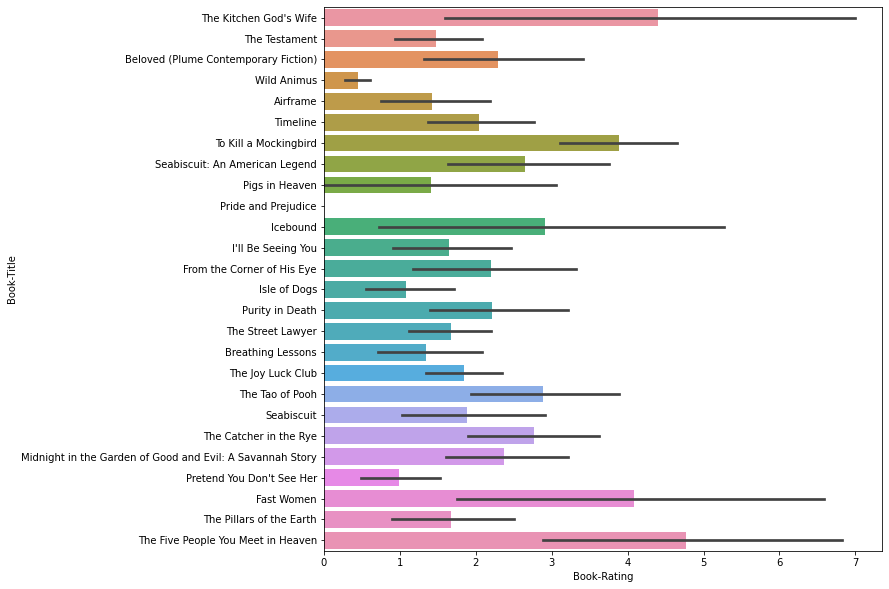

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.barplot(x='Book-Rating', y= 'Book-Title', data = Book_df.head(2000))

In [25]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
author_string = " ".join(Book_df['Book-Author'].astype(str))
title_string = " ".join(Book_df['Book-Title'].astype(str))
stop_words = set(STOPWORDS)

def wcl(string, title= None):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21,
                   stopwords=stop_words).generate(string)
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.imshow(wc)

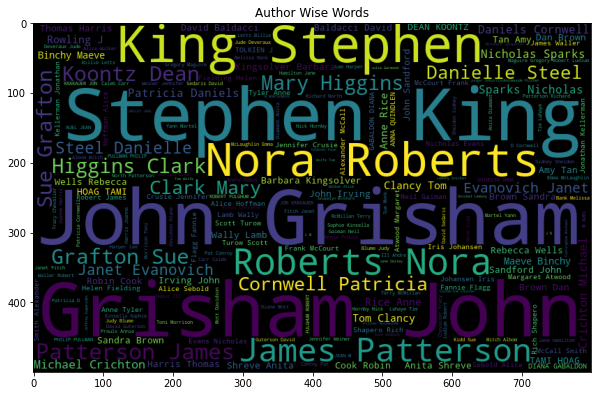

In [26]:
wcl(author_string, 'Author Wise Words')

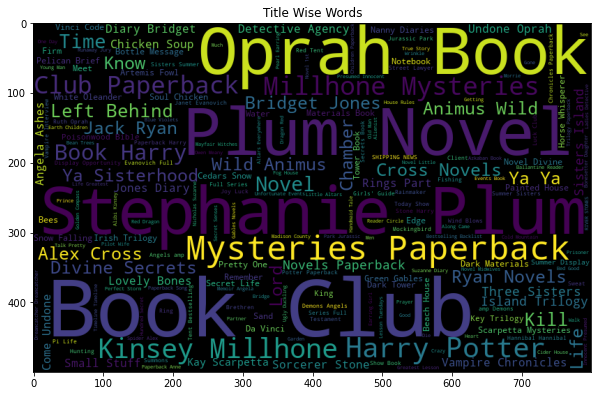

In [27]:
wcl(title_string, 'Title Wise Words')

In [28]:
Book_pivot = Book_df.pivot_table( index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [29]:
Book_pivot.fillna(0, inplace= True)

In [30]:
Book_pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
score = cosine_similarity(Book_pivot)

In [44]:
def recommend(book_name):
    index = np.where(Book_pivot.index == book_name)[0][0]
    distance = score[index]
    sim_lst= sorted(list(enumerate(score[index])), key = lambda x: x[1], reverse = True)[1:11]
    data= []
    for i in sim_lst:
        item = []
        temp_df = Book_df[Book_df['Book-Title'] == Book_pivot.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data
        

In [45]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. Salinger',
  'http://images.amazon.com/images/P/0316769487.01.MZZZZZZZ.jpg'],
 ['Naked',
  'David Sedaris',
  'http://images.amazon.com/images/P/0316777730.01.MZZZZZZZ.jpg'],
 ['The Hundred Secret Senses',
  'Amy Tan',
  'http://images.amazon.com/images/P/0399141146.01.MZZZZZZZ.jpg']

In [35]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [47]:
pickle.dump(Book_pivot, open ('Book_pivot.pkl', 'wb'))
pickle.dump(Book_df, open ('Book_df.pkl', 'wb'))
pickle.dump(score, open ('score.pkl', 'wb'))